In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'

SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [5]:
from lv.pca import PCA

In [53]:
p = PCA(flux, mask)

3it [01:23, 27.87s/it]


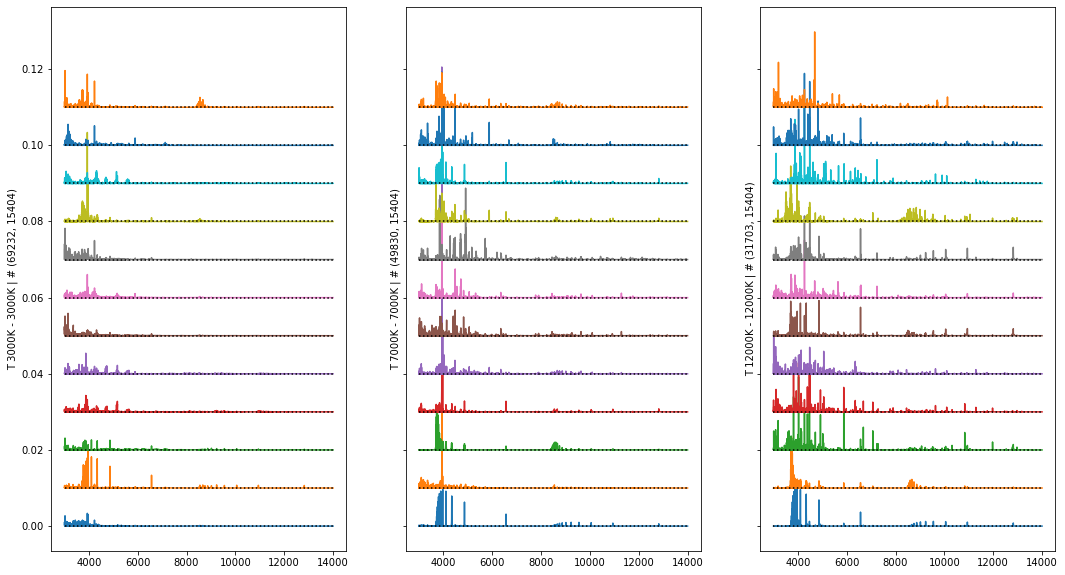

In [66]:
p.plot_all_vs(step=0.01)

In [63]:
p.X[0].shape, p.X[1].shape, p.X[2].shape

((69232, 15404), (49830, 15404), (31703, 15404))

In [12]:
with h5py.File(GRID_PATH, 'r') as f:
    fluxGd = f['flux'][:,:,:,:,:,s:e]
    maskGd = f['flux_idx'][:,:,:,:,:,s:e]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
#     T_eff = f['T_eff'][()]
    waveGd = f['wave'][()]

MemoryError: Unable to allocate 28.0 GiB for an array with shape (14, 66, 11, 6, 4, 15404) and data type float64

In [7]:
waveGd.shape

(21691,)

In [9]:
s = np.digitize(3000, waveGd)
e = np.digitize(14000, waveGd)

In [10]:
waveGd[s:e].shape

(15404,)

In [84]:
log_flux = np.log(np.where(fluxGd[..., s:e]<=1., 1, fluxGd[..., s:e]))

MemoryError: Unable to allocate 28.0 GiB for an array with shape (14, 66, 11, 6, 4, 15404) and data type float64

In [80]:
log_flux = np.log(fluxGd[..., s:e])

<ipython-input-80-086e47995be4>:1: RuntimeWarning: divide by zero encountered in log
  log_flux = np.log(fluxGd[..., s:e])


In [81]:
maskGd.shape

(14, 66, 11, 6, 4)

In [ ]:
log_mask = maskGd[]

In [ ]:
p = PCA(flux, mask)